<a href="https://colab.research.google.com/github/anaramos5582/bootcamp-womakerscode/blob/main/Desafio_Estatistica_Amostragem_AnaPaulaBarrosRamos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Desafio Estatistica e Amostragem - WoMakersCode
#### Desenvolvido por Ana Paula Barros Ramos
Considerando a base de dados de populacao_brasileira.json responda as
questões abaixo (os dados são fictícios).
Você é uma pesquisadora desenvolvendo uma análise sobre as
características da força de trabalho nos estados brasileiros. Responda as
perguntas abaixo:
1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.
2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?
3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?
4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?
5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.
6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?
7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.
8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?
9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?
10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import binom, norm
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

Saving populacao_brasileira.csv to populacao_brasileira.csv


In [ ]:
df = pd.read_csv('populacao_brasileira.csv')

In [ ]:
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
df.shape

(1000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1000 non-null   int64  
 1   estado                           1000 non-null   object 
 2   idade                            1000 non-null   int64  
 3   escolaridade                     1000 non-null   object 
 4   nível de proficiência em inglês  1000 non-null   object 
 5   renda                            1000 non-null   float64
 6   sexo                             1000 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [ ]:
df.rename(columns={'Unnamed: 0':'index'}, inplace=True)

In [ ]:
df.index.nunique()

1000

1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.

In [ ]:
df['nível de proficiência em inglês'].unique()

array(['Intermediário', 'Básico', 'Avançado'], dtype=object)

In [ ]:
df_fluente = df[df['nível de proficiência em inglês'] == 'Avançado']
df_fluente

,index,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
4,4,SE,25,Fundamental,Avançado,3529.80,M
5,5,AM,38,Fundamental,Avançado,4441.57,F
7,7,DF,36,Superior,Avançado,2203.10,F
9,9,AP,28,Superior,Avançado,2796.95,M
18,18,MS,41,Pós-graduação,Avançado,2512.39,F
...,...,...,...,...,...,...,...
989,989,RR,30,Médio,Avançado,4543.24,M
991,991,RO,20,Superior,Avançado,1880.38,F
993,993,RS,23,Superior,Avançado,1231.56,M
994,994,DF,27,Pós-graduação,Avançado,3323.17,F


In [ ]:
prob_fluente = df_fluente.shape[0]/df.shape[0]
prob_fluente

0.344

In [ ]:
prob_complementar = round((1 - prob_fluente)*100,2)
prob_complementar

65.6

In [ ]:
print(f'A probabilidade complementar, de ela não ser fluente em inglês é {prob_complementar}% .')

A probabilidade complementar, de ela não ser fluente em inglês é 65.6% .


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
df_alagoas_para = df[df['estado'].isin(['AL','PA'])]
df_alagoas_para

,index,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
17,17,PA,19,Médio,Básico,2588.12,M
32,32,PA,33,Superior,Intermediário,3018.42,F
74,74,PA,48,Fundamental,Intermediário,3279.97,M
106,106,AL,52,Superior,Básico,2754.26,F
114,114,AL,26,Fundamental,Intermediário,2731.11,F
...,...,...,...,...,...,...,...
972,972,AL,22,Pós-graduação,Avançado,1858.31,M
976,976,AL,36,Médio,Avançado,2917.32,F
977,977,AL,37,Fundamental,Intermediário,2878.25,F
982,982,AL,18,Superior,Intermediário,4221.03,F


In [ ]:
df_alagoas_para_5mil = df_alagoas_para[df_alagoas_para['renda']>5000]
df_alagoas_para_5mil

,index,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
116,116,PA,29,Fundamental,Intermediário,5573.36,F
371,371,PA,57,Fundamental,Intermediário,5163.25,M
619,619,AL,62,Fundamental,Básico,5252.44,M
691,691,AL,53,Superior,Intermediário,5210.52,F


In [ ]:
prob_alagoas_para_5mil = df_alagoas_para_5mil.shape[0]/df_alagoas_para.shape[0]
prob = prob_alagoas_para_5mil*100

In [ ]:
print(f'A probabilidade de uma pessoa ser do estado de AL ou do Pará e ter uma renda superior a 5 mil reais é de {prob:.2f}%.')


A probabilidade de uma pessoa ser do estado de AL ou do Pará e ter uma renda superior a 5 mil reais é de 5.06%.


3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
# Definindo a amostra
df_prob_am = df[df['estado'] == 'AM']
df_prob_am

,index,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
2,2,AM,32,Fundamental,Intermediário,3835.69,M
5,5,AM,38,Fundamental,Avançado,4441.57,F
13,13,AM,57,Médio,Básico,2844.32,M
23,23,AM,38,Médio,Intermediário,5075.40,M
45,45,AM,31,Pós-graduação,Básico,5270.69,F
54,54,AM,25,Superior,Intermediário,3478.98,M
97,97,AM,41,Superior,Intermediário,1345.14,F
149,149,AM,21,Superior,Básico,2625.18,F
195,195,AM,49,Fundamental,Básico,1297.42,M
230,230,AM,33,Pós-graduação,Intermediário,2373.03,M


In [ ]:
df_prob_am.shape

(38, 7)

In [ ]:
df_ensino_superior_am=df_prob_am[df_prob_am['escolaridade'].isin(['Superior','Pós-graduação'])]
df_ensino_superior_am

,index,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
45,45,AM,31,Pós-graduação,Básico,5270.69,F
54,54,AM,25,Superior,Intermediário,3478.98,M
97,97,AM,41,Superior,Intermediário,1345.14,F
149,149,AM,21,Superior,Básico,2625.18,F
230,230,AM,33,Pós-graduação,Intermediário,2373.03,M
330,330,AM,21,Pós-graduação,Avançado,3658.54,M
344,344,AM,63,Pós-graduação,Básico,2510.56,F
407,407,AM,60,Pós-graduação,Intermediário,1929.92,F
423,423,AM,33,Pós-graduação,Intermediário,4329.15,F
425,425,AM,59,Pós-graduação,Intermediário,3709.00,F


In [ ]:
df_ensino_superior_am.shape

(21, 7)

In [ ]:
prob_es = df_ensino_superior_am.shape[0]/df_prob_am.shape[0]
prob_es

0.5526315789473685

In [ ]:
# Probabilidade de serem do Amazonas e não terem ensino superior
prob_complementar= 1 - prob_es
prob_es

0.5526315789473685

In [ ]:
prob = (prob_complementar**4)*prob_es*100
prob

2.2135890467222827

In [ ]:
print(f'A probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo, assumindo que as 4 primeiras não tem ensino superior é {prob:.2f}%.')

A probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo, assumindo que as 4 primeiras não tem ensino superior é 2.21%.


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?

In [ ]:
df['renda'].describe()

count    1000.000000
mean     3082.537180
std       996.572239
min       103.740000
25%      2425.815000
50%      3076.415000
75%      3714.487500
max      5632.380000
Name: renda, dtype: float64

In [ ]:
def faixa_salarial(renda):

  faixa_salarial = [(0,1500), (1501,3000), (3001,4500), (4501,6000)]
  labels = ['<1500','1500-3000','3000-4500','4500-6000']

  for i,faixa in enumerate(faixa_salarial):
      if faixa[0] <= int(renda) <= faixa[1]:
        return labels[i]
  return 'Desconhecida'

In [ ]:
df_salario = df.copy()
df_salario['faixa'] = df_salario['renda'].apply(faixa_salarial)

In [ ]:
df_salario.groupby(['faixa'])['index'].count()

faixa
1500-3000    414
3000-4500    443
4500-6000     88
<1500         55
Name: index, dtype: int64

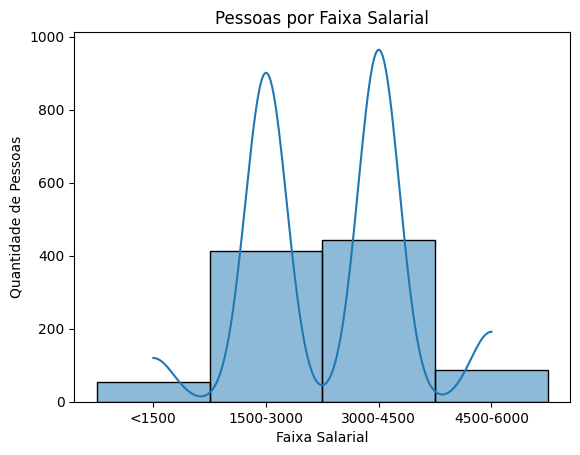

In [ ]:
# Definindo a ordem da Faixa Salarial
ordem_faixa_salarial = pd.CategoricalDtype(categories=['<1500','1500-3000','3000-4500','4500-6000'], ordered = True)
df_salario['faixa'] = df_salario['faixa'].astype(ordem_faixa_salarial)

sns.histplot(x='faixa', data=df_salario, kde=True)
plt.title("Pessoas por Faixa Salarial")
plt.xlabel("Faixa Salarial")
plt.ylabel("Quantidade de Pessoas")
plt.show()

In [ ]:
print ('Considerando que as faixas de renda foram definidas a partir do valor 0, as faixas se concentram entre 1500-3000 e 3001 e 4500.')

Considerando que as faixas de renda foram definidas a partir do valor 0, as faixas se concentram entre 1500-3000 e 3001 e 4500.


5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.

In [ ]:
# Calcula a média e a variância
media_amostra = df['renda'].mean()
variancia_amostra = df['renda'].var()
print(f'A média da renda da amostra dos dados é {media_amostra:.2f}')
print(f'A variância da renda da amostra dos dados é {variancia_amostra:.2f}')

A média da renda da amostra dos dados é 3082.54
A variância da renda da amostra dos dados é 993156.23


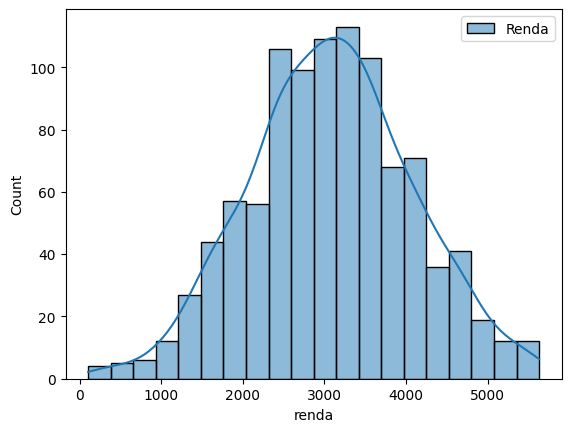

In [ ]:
# Plotar histograma
sns.histplot(df['renda'], bins=20,  kde=True, label='Renda')
plt.legend()
plt.show()

O gráfico representa a comparação entre os quantis teóricos de uma Normal e os quantis dos dados da nossa amostra, confirmando que os dados seguem uma distribuição normal.


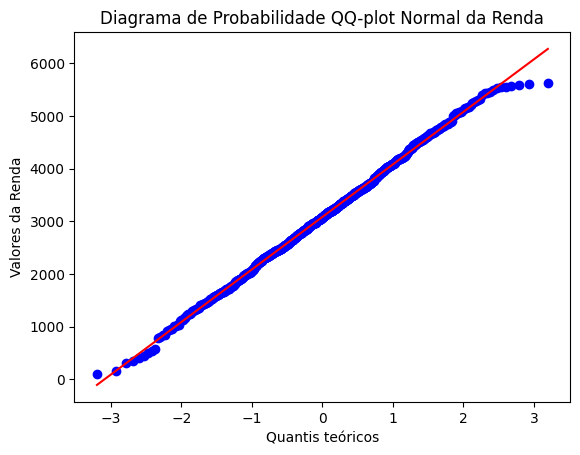

In [ ]:
stats.probplot(df['renda'], dist='norm', plot=plt)
plt.title('Diagrama de Probabilidade QQ-plot Normal da Renda')
plt.xlabel('Quantis teóricos')
plt.ylabel('Valores da Renda')
print('O gráfico representa a comparação entre os quantis teóricos de uma Normal e os quantis dos dados da nossa amostra, confirmando que os dados seguem uma distribuição normal.')

6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
df_posg = df[df['escolaridade'] == 'Pós-graduação']
df_posg

,index,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
11,11,SC,41,Pós-graduação,Intermediário,2396.01,M
15,15,GO,20,Pós-graduação,Básico,3254.42,M
16,16,RO,39,Pós-graduação,Básico,3337.60,M
18,18,MS,41,Pós-graduação,Avançado,2512.39,F
19,19,SP,61,Pós-graduação,Básico,2567.44,F
...,...,...,...,...,...,...,...
987,987,PA,28,Pós-graduação,Avançado,4088.75,M
988,988,SC,53,Pós-graduação,Básico,4884.59,F
992,992,DF,50,Pós-graduação,Básico,3140.89,F
994,994,DF,27,Pós-graduação,Avançado,3323.17,F


In [ ]:
prob_posg = df_posg.shape[0]/df.shape[0]
prob_posg

0.253

In [ ]:
# Definindo amostra de 1 milhão
amostra = 1000000
posgraduados = 243000
prob = posgraduados/amostra

In [ ]:
# Probabilidade Binomial
probabilidade = binom.pmf(posgraduados,amostra,prob_posg)
probabilidade

1.1104854289794913e-119

In [ ]:
print(f'A probabilidade de encontrarmos 243 mil pessoas com pós-graduação em 1 milhão de habitante é {probabilidade}.')

A probabilidade de encontrarmos 243 mil pessoas com pós-graduação em 1 milhão de habitante é 1.1104854289794913e-119.


7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

In [ ]:
df.escolaridade.unique()

array(['Fundamental', 'Superior', 'Médio', 'Pós-graduação'], dtype=object)

In [ ]:
df_soma_escolaridade = df['escolaridade'].value_counts().sort_values(ascending=True).rename_axis("Ensino")

df_soma = df_soma_escolaridade.cumsum().to_frame(name='Soma')

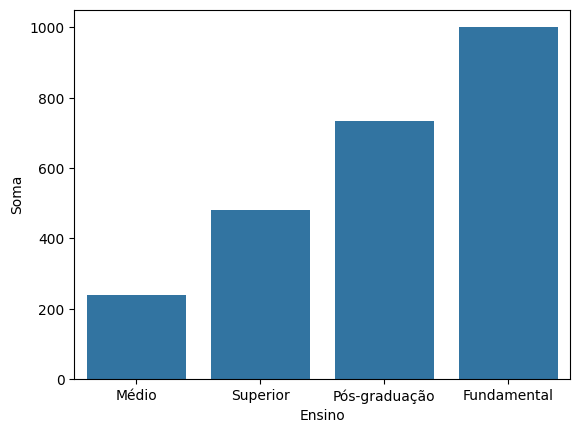

In [ ]:
sns.barplot(y='Soma', x='Ensino', data=df_soma)
plt.show()

8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?

In [ ]:
df_ingles_intermediario = df[df['nível de proficiência em inglês'] == 'Intermediário']
df_ingles_intermediario

,index,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
2,2,AM,32,Fundamental,Intermediário,3835.69,M
6,6,DF,56,Médio,Intermediário,528.36,F
10,10,AC,28,Superior,Intermediário,3371.15,M
11,11,SC,41,Pós-graduação,Intermediário,2396.01,M
...,...,...,...,...,...,...,...
984,984,AP,31,Médio,Intermediário,2773.52,F
985,985,ES,55,Fundamental,Intermediário,2040.56,M
990,990,TO,60,Fundamental,Intermediário,2511.15,M
997,997,GO,27,Pós-graduação,Intermediário,1405.30,F


In [ ]:
prob_ing_intermediario = df_ingles_intermediario.shape[0]/df.shape[0]
prob_ing_intermediario

0.329

In [ ]:
prob_complementar_ing_intermediario = 1 - prob_ing_intermediario
prob_complementar_ing_intermediario

0.671

In [ ]:
# Definindo nível de significância de 5%
a = 0.05
z = norm.ppf(1-a/2)
z = round(z,2)
z

1.96

In [ ]:
margem_erro = z * np.sqrt((prob_ing_intermediario * prob_complementar_ing_intermediario)/df.shape[0])
margem_erro = margem_erro * 100
margem_erro

2.912160322509734

In [ ]:
print (f'A margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário é de {margem_erro:.2f}%.')

A margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário é de 2.91%.


9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?

In [ ]:
# Calcula a média da renda da população
media_amostra = df['renda'].mean()
media_amostra

3082.5371800000003

In [ ]:
df_renda_superior = df[df['renda'] >= (media_amostra + 1000)]
df_renda_superior

,index,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
5,5,AM,38,Fundamental,Avançado,4441.57,F
14,14,CE,41,Médio,Básico,4167.78,M
23,23,AM,38,Médio,Intermediário,5075.40,M
26,26,MS,39,Pós-graduação,Intermediário,4201.21,F
33,33,SC,32,Pós-graduação,Avançado,4676.44,F
...,...,...,...,...,...,...,...
981,981,PB,64,Médio,Intermediário,4854.09,F
982,982,AL,18,Superior,Intermediário,4221.03,F
987,987,PA,28,Pós-graduação,Avançado,4088.75,M
988,988,SC,53,Pós-graduação,Básico,4884.59,F


In [ ]:
prob_renda_superior = df_renda_superior.shape[0]/df.shape[0]
prob_renda_superior

0.161

In [ ]:
prob_60_pessoas = prob_renda_superior ** 60
prob_60_pessoas

2.5677489595221674e-48

In [ ]:
print(f'A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é {prob_60_pessoas}.')

A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é 2.5677489595221674e-48.


10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?

In [ ]:
df_sudeste = df[df['estado'].isin(['ES','MG','RJ','SP'])]
df_sudeste

,index,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
12,12,SP,53,Médio,Intermediário,3086.59,F
19,19,SP,61,Pós-graduação,Básico,2567.44,F
22,22,SP,19,Médio,Básico,3289.77,F
39,39,SP,38,Pós-graduação,Avançado,3770.87,F
40,40,MG,26,Superior,Básico,1521.41,M
...,...,...,...,...,...,...,...
964,964,RJ,55,Médio,Básico,2181.80,F
969,969,ES,43,Pós-graduação,Básico,3955.31,M
979,979,MG,37,Médio,Intermediário,3630.81,M
985,985,ES,55,Fundamental,Intermediário,2040.56,M


In [ ]:
df_sudeste_homem_fund_2mil = df_sudeste[(df_sudeste['sexo'] == 'M') & (df_sudeste['escolaridade'] == 'Fundamental') & (df_sudeste['renda'] > 2000)]
df_sudeste_homem_fund_2mil

,index,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
155,155,ES,32,Fundamental,Intermediário,3615.94,M
163,163,ES,45,Fundamental,Básico,4049.01,M
205,205,ES,19,Fundamental,Avançado,3026.09,M
301,301,SP,50,Fundamental,Avançado,2786.01,M
505,505,SP,18,Fundamental,Básico,2961.49,M
524,524,MG,27,Fundamental,Intermediário,4148.77,M
612,612,RJ,19,Fundamental,Intermediário,2008.61,M
626,626,RJ,21,Fundamental,Intermediário,4022.57,M
680,680,ES,29,Fundamental,Intermediário,2164.65,M
732,732,MG,50,Fundamental,Intermediário,4091.31,M


In [ ]:
df_sudeste_homem_fund_2mil.shape

(19, 7)

In [ ]:
probabilidade = df_sudeste_homem_fund_2mil.shape[0]/df_sudeste.shape[0]
probabilidade = probabilidade * 100
probabilidade

12.101910828025478

In [ ]:
print(f'A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é {probabilidade:.2f}%.')

A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é 12.10%.
